In [2]:
import pywph as pw
import numpy as np
import torch
import torch.utils.data as data_utils
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
import sklearn
import matplotlib.pyplot as plt
# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [55]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_Mtot_Astrid_CV_z=0.00.npy"
ast_maps = np.log10(np.load(fmaps))

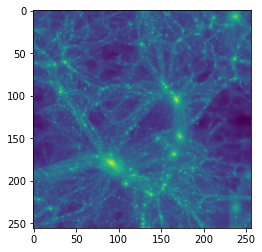

In [47]:
i=0
plt.imshow(np.log10(simba_maps[i,:,:]))
plt.axis("off")
plt.savefig("SIMBA_Mtot.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(tng_maps[i,:,:]))
plt.axis("off")
plt.savefig("TNG_Mtot.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(ast_maps[i,:,:]))
plt.show()

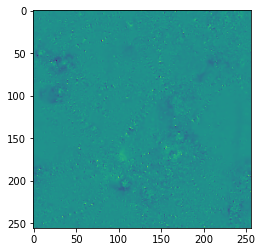

In [56]:
i=0; A=50; B=150
plt.imshow(np.log10(simba_maps[i,:,:])-np.log10(tng_maps[i,:,:]))
plt.axis("off")
plt.savefig("SIMBA-TNG_Mtot.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(ast_maps[i,:,:])-np.log10(tng_maps[i,:,:]))
plt.show()

In [50]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_HI_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_HI_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_HI_Astrid_CV_z=0.00.npy"
ast_maps = np.log10(np.load(fmaps))

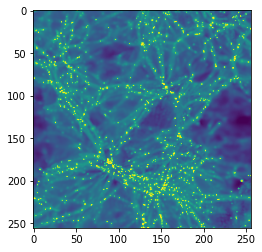

In [53]:
i=0
plt.imshow(np.log10(simba_maps[i,:,:]), vmin=0.5,vmax=1)
plt.axis("off")
plt.savefig("SIMBA_HI.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(tng_maps[i,:,:]), vmin=0.5,vmax=1)
plt.axis("off")
plt.savefig("TNG_HI.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(ast_maps[i,:,:]), vmin=0.5,vmax=1)
plt.show()

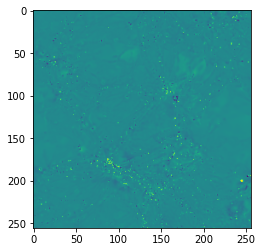

In [54]:
i=0; A=50; B=150
plt.imshow(np.log10(simba_maps[i,:,:])-np.log10(tng_maps[i,:,:]))
plt.axis("off")
plt.savefig("SIMBA-TNG_HI.png", dpi=400, bbox_inches="tight")
plt.close()
plt.imshow(np.log10(ast_maps[i,:,:])-np.log10(tng_maps[i,:,:]))
plt.show()

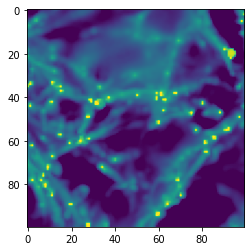

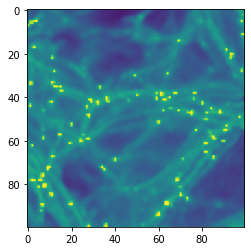

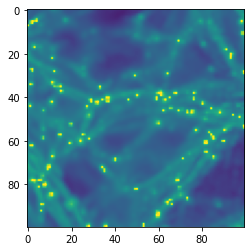

In [32]:
i=0; A=50; B=150
plt.imshow(np.log10(simba_maps[i,A:B,A:B]), vmin=0.5,vmax=1)
plt.show()
plt.imshow(np.log10(tng_maps[i,A:B,A:B]), vmin=0.5,vmax=1)
plt.show()
plt.imshow(np.log10(ast_maps[i,A:B,A:B]), vmin=0.5,vmax=1)
plt.show()

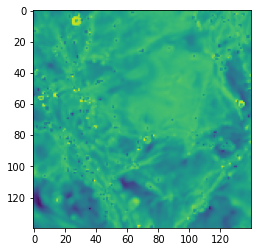

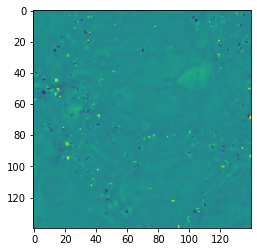

In [36]:
i=0; A=10; B=150
plt.imshow(np.log10(simba_maps[i,A:B,A:B])-np.log10(tng_maps[i,A:B,A:B]))
plt.show()
plt.imshow(np.log10(ast_maps[i,A:B,A:B])-np.log10(tng_maps[i,A:B,A:B]))
plt.show()

In [26]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_T_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_T_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_T_Astrid_CV_z=0.00.npy"
ast_maps = np.log10(np.load(fmaps))

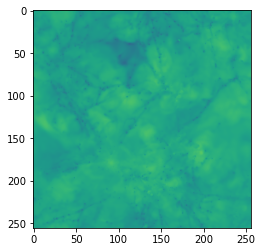

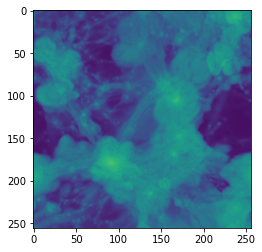

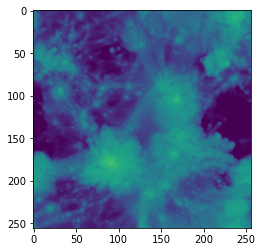

In [27]:
i=0
plt.imshow(np.log10(simba_maps[i,:,:]), vmin=0.5,vmax=1)
plt.show()
plt.imshow(np.log10(tng_maps[i,:,:]), vmin=0.5,vmax=1)
plt.show()
plt.imshow(np.log10(ast_maps[i,:,:]), vmin=0.5,vmax=1)
plt.show()

In [12]:
x_ray = np.load("./../data/Maps_Xray_SIMBA_LH_z=0.00.npy")

In [13]:
x_ray.shape

(15000, 256, 256)

In [14]:
i=1499

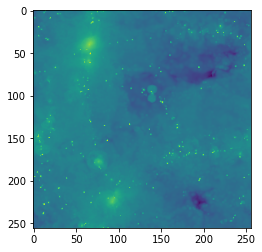

In [15]:
plt.imshow(np.log10(x_ray[i,:,:]))

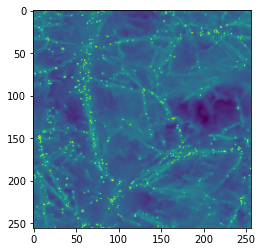

In [16]:
plt.imshow(simba_maps[i,:,:])

In [18]:
x_ray = np.load("./../data/Maps_Xray_IllustrisTNG_LH_z=0.00.npy")

In [19]:
x_ray.shape

(15000, 256, 256)

In [20]:
i=1499

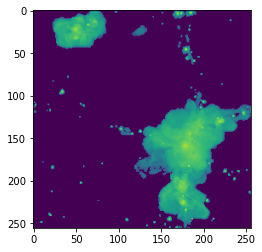

In [21]:
plt.imshow(np.log10(x_ray[i,:,:]))

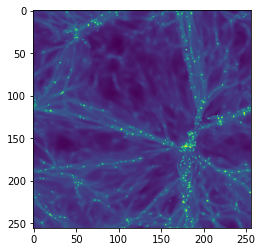

In [22]:
plt.imshow(tng_maps[i,:,:])

## Gadget & Ramses

In [2]:
fmap = "/mnt/ceph/users/fvillaescusa/Nbody_systematics/data/maps/maps_Gadget/Images_M_Gadget_LH_z=0.00.npy"
gmap = np.log10(np.load(fmap))
fmap = "/mnt/ceph/users/fvillaescusa/Nbody_systematics/data/maps/maps_Ramses/Images_M_Ramses_LH_z=0.00.npy"
rmap = np.log10(np.load(fmap))

In [ ]:
maps = gmap
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 12
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
wph = wph_op(nmaps[0,:,:])
coef = wph.cpu().detach().numpy()
print(coef.shape)

Process ForkPoolWorker-95:
Process ForkPoolWorker-110:
Process ForkPoolWorker-112:
Process ForkPoolWorker-87:
Process ForkPoolWorker-86:
Process ForkPoolWorker-90:
Process ForkPoolWorker-89:
Process ForkPoolWorker-97:
Process ForkPoolWorker-93:
Process ForkPoolWorker-100:
Process ForkPoolWorker-85:
Process ForkPoolWorker-102:
Process ForkPoolWorker-111:
Process ForkPoolWorker-88:
Process ForkPoolWorker-99:
Process ForkPoolWorker-101:
Process ForkPoolWorker-108:
Process ForkPoolWorker-98:
Process ForkPoolWorker-91:
Traceback (most recent call last):
Process ForkPoolWorker-92:
Process ForkPoolWorker-94:
Traceback (most recent call last):
Process ForkPoolWorker-103:
Traceback (most recent call last):
Process ForkPoolWorker-104:
Traceback (most recent call last):
Process ForkPoolWorker-96:
  File "/mnt/sw/nix/store/z6v265ivx5w6xbajay41vdfc0la8gla5-python-3.9.12-view/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Tracebac

In [14]:
J = 7; L = 4; dn = 0
maps = gmap
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 4
dn = 2
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nGadget_for_vib_total",coef)

/tmp/ipykernel_769782/2452356544.py:25: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [22]:
J = 7; L = 4; dn = 0

M, N = 256, 256
J = 7
L = 4
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(gamp[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_Gadget_for_vib_total",coef)

NameError: name 'gamp' is not defined

In [15]:
J = 7; L = 4; dn = 0
maps = rmap
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 4
dn = 2
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nRamses_for_vib_total",coef)

/tmp/ipykernel_769782/2115694029.py:25: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [ ]:
J = 7; L = 4; dn = 0

M, N = 256, 256
J = 7
L = 4
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(rmap[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_Ramses_for_vib_total",coef)

## TNG & SIMBA

In [16]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_IllustrisTNG_LH_z=0.00.npy"
# read the data
tng_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_SIMBA_LH_z=0.00.npy"
# read the data
simba_maps = np.log10(np.load(fmaps))

In [7]:
J = 7; L = 4; dn = 0
maps = tng_maps
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 10
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nIllustrisTNG_for_vib_total_",coef)

/tmp/ipykernel_544110/2297869189.py:25: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [19]:
J = 7; L = 4; dn = 0

M, N = 256, 256
J = 7
L = 4
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(tng_maps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_IllustrisTNG_for_vib_total",coef)

/tmp/ipykernel_3995025/1593722814.py:20: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [ ]:
J = 7; L = 4; dn = 0
maps = simba_maps
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 10
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nSIMBA_for_vib_total_",coef)

/tmp/ipykernel_544110/633692232.py:25: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [21]:
J = 7; L = 4; dn = 0

M, N = 256, 256
J = 7
L = 4
dn = 0
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_SIMBA_for_vib_total",coef)

/tmp/ipykernel_3995025/312814180.py:20: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


### Mgas Mstar HI ne Vcdm Z

In [3]:
for field in ['T', 'Mgas','Mstar','HI','ne','Vcdm','Z']:
    fmaps = \
            "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{}_IllustrisTNG_LH_z=0.00.npy".format(field)
    # read the data
    maps = np.load(fmaps)
    maps[maps<=0] = 1e-5
    tng_maps = np.log10(maps)
    fmaps = \
            "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{}_SIMBA_LH_z=0.00.npy".format(field)
    # read the data
    maps = np.load(fmaps)
    maps[maps<=0] = 1e-5
    simba_maps = np.log10(maps)

    maps = tng_maps
    nmaps = maps.reshape(maps.shape[0],-1)
    nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
    #nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
    nmaps = nmaps.T.reshape(15000,256,256)

    M, N = 256, 256
    J = 7
    L = 4
    dn = 2
    try: 
        del coef
    except:
        pass
    wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
    batch_size = 100
    N = int(15000/batch_size)
    for i in range(N):
        wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
        try:
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
        except:
            num_coeffs = wph.shape[1]
            coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    np.save("../data/wph_nIllustrisTNG_{}_for_vib_total".format(field),coef)

    maps = simba_maps
    nmaps = maps.reshape(maps.shape[0],-1)
    nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
    #nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
    nmaps = nmaps.T.reshape(15000,256,256)

    try: 
        del coef
    except:
        pass
    wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
    batch_size = 100
    N = int(15000/batch_size)
    for i in range(N):
        wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
        try:
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
        except:
            num_coeffs = wph.shape[1]
            coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    np.save("../data/wph_nSIMBA_{}_for_vib_total".format(field),coef)

/tmp/ipykernel_544110/3039087868.py:38: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


IndexError: index 149 is out of bounds for axis 1 with size 44

## ASTRID

In [ ]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/Results/images_Astrid/Images_Mtot_Astrid_LH_z=0.00.npy"
# read the data
ast_maps = np.log10(np.load(fmaps))

maps = ast_maps
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256
J = 7
L = 4
dn = 2
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15000/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
    try:
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nAstrid_for_vib_total",coef)

In [ ]:
for field in ['Mgas','Mstar','HI','ne','Vcdm','Z', 'T']:
#for field in ['T']:
    fmaps = \
            "/mnt/home/fvillaescusa/CAMELS/Results/images_Astrid/Images_{}_Astrid_LH_z=0.00.npy".format(field)
    # read the data
    maps = np.load(fmaps)
    maps[maps<=0] = 1e-5
    ast_maps = np.log10(maps)

    maps = ast_maps
    nmaps = maps.reshape(maps.shape[0],-1)
    nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
    #nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
    nmaps = nmaps.T.reshape(15000,256,256)

    M, N = 256, 256
    J = 7
    L = 4
    dn = 2
    try: 
        del coef
    except:
        pass
    wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
    batch_size = 100
    N = int(15000/batch_size)
    for i in range(N):
        wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
        try:
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
        except:
            num_coeffs = wph.shape[1]
            coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    np.save("../data/wph_nAstrid_{}_for_vib_total".format(field),coef)

## SB28

In [40]:
np.save("../data/SB28_index.npy",index)

In [36]:
index= []
try:
    del sb_maps
except:
    pass
for i in range(1000):
    fname =\
    "/mnt/home/fvillaescusa/CAMELS/Results/images_IllustrisTNG_SB28/Images_Mtot_IllustrisTNG_SB28_SB28_{}_z=0.00.npy"\
    .format(i)
    try:
        #print(np.log10(np.load(fname)).shape)
        sb_maps = np.r_[sb_maps, np.log10(np.load(fname))]
        index.append(i)
    except NameError:
        sb_maps = np.log10(np.load(fname))
        index.append(i)
    except FileNotFoundError:
        continue

#print(sb_maps.shape)
#raise

maps = sb_maps
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15*len(index),256,256)

M, N = 256, 256
J = 7
L = 4
dn = 2
try: 
    del coef
except:
    pass
wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
batch_size = 100
N = int(15*len(index)/batch_size)
for i in range(N):
    wph = wph_op(nmaps[batch_size*i:min(15*len(index),batch_size*(i+1)),:,:])
    try:
        coef[batch_size*i:min(15*len(index),batch_size*(i+1)),:] = wph.cpu().detach().numpy()
    except:
        num_coeffs = wph.shape[1]
        coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
        coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
np.save("../data/wph_nTNG_SB28_for_vib_total",coef)

/tmp/ipykernel_860181/3980123170.py:46: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)


In [ ]:
for field in ['Mgas','Mstar','HI','ne','Vcdm','Z', 'T']:
#for field in ['T']:
    fmaps = \
            "/mnt/home/fvillaescusa/CAMELS/Results/images_Astrid/Images_{}_Astrid_LH_z=0.00.npy".format(field)
    # read the data
    maps = np.load(fmaps)
    maps[maps<=0] = 1e-5
    ast_maps = np.log10(maps)

    maps = ast_maps
    nmaps = maps.reshape(maps.shape[0],-1)
    nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
    #nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
    nmaps = nmaps.T.reshape(15000,256,256)

    M, N = 256, 256
    J = 7
    L = 4
    dn = 2
    try: 
        del coef
    except:
        pass
    wph_op = pw.WPHOp(M, N, J, L=L, dn=dn, device=0)
    batch_size = 100
    N = int(15000/batch_size)
    for i in range(N):
        wph = wph_op(nmaps[batch_size*i:batch_size*(i+1),:,:])
        try:
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
        except:
            num_coeffs = wph.shape[1]
            coef = np.zeros((N*batch_size,num_coeffs), dtype=np.complexfloating)
            coef[batch_size*i:batch_size*(i+1),:] = wph.cpu().detach().numpy()
    np.save("../data/wph_nAstrid_{}_for_vib_total".format(field),coef)

# Iso Coefficieints

In [9]:
import sys, os 
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from wph_utils import WPH

In [10]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_IllustrisTNG_LH_z=0.00.npy"
# read the data
tng_maps = np.log10(np.load(fmaps))
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_SIMBA_LH_z=0.00.npy"
# read the data
simba_maps = np.log10(np.load(fmaps))

In [11]:
J = 7; L = 4; dn = 0
maps = tng_maps
nmaps = maps.reshape(maps.shape[0],-1)
nmaps = (nmaps.T - nmaps.mean(axis=1))/nmaps.std(axis=1)
#nmaps = (nmaps.T - nmaps.min(axis=1))/(nmaps.max(axis=1)-nmaps.min(axis=1)
nmaps = nmaps.T.reshape(15000,256,256)

M, N = 256, 256

try:
    del coef
except:
    pass

wph     = WPH(nmaps, shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
ncoefs  = wph.batchGetAllIsoCoeffs()

In [12]:
ncoefs

{'S00': array([[0.00316579+4.8353921e-13j, 0.00335443-6.9523131e-13j,
         0.00437495-6.4995828e-13j, ..., 0.00712113-4.6086281e-12j,
         0.00594599-3.0483996e-12j, 0.00354958+1.2942932e-12j],
        [0.00246367+2.7125947e-13j, 0.002811  +1.4147127e-13j,
         0.00386286+5.7041004e-13j, ..., 0.00748577+9.0754652e-12j,
         0.00662946+2.0041935e-12j, 0.00462591-2.8787656e-11j],
        [0.0029382 -2.0242431e-13j, 0.00346054-3.2041156e-14j,
         0.00474066-6.0108586e-13j, ..., 0.00928511+6.9127889e-12j,
         0.00638363+2.9868981e-12j, 0.00231035-1.5111393e-13j],
        ...,
        [0.00323668-1.3880010e-13j, 0.0035501 +4.4963564e-13j,
         0.00484919+7.0817511e-13j, ..., 0.0079228 -3.7489690e-12j,
         0.00542801+1.3959115e-11j, 0.00320233+1.6206223e-12j],
        [0.00356058+4.8630631e-13j, 0.00369474+1.6003466e-13j,
         0.0047409 +9.8273820e-13j, ..., 0.0084419 +9.6718657e-12j,
         0.00780107-1.8556462e-11j, 0.0037286 +8.4922304e-14j],
     

In [3]:
import numpy as np

In [4]:
fname = "/mnt/home/fvillaescusa/CAMELS/Results/images_IllustrisTNG_SB28/Images_Mtot_IllustrisTNG_SB28_SB28_54_z=0.00.npy"
a = np.load(fname)
/mnt/home/fvillaescusa/CAMELS/Sims/IllustrisTNG_SB28

In [5]:
a.shape

(15, 256, 256)